# Índice de Fuerza Relativa (RSI) para NVDA

In [2]:
#ntalamos las librerías necesarias
!pip install ta
!pip install yfinance --upgrade --no-cache-dir
!pip install hurst

In [3]:
# Importar Librerías

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import ta
from tqdm import tqdm
from scipy.optimize import minimize
from hurst import compute_Hc
import warnings
warnings.filterwarnings("ignore")


In [4]:
# El código aquí nos permitirá cambiar los gráficos a modo oscuro

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cycler
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")

# 1: Explicación y cálculo del RSI

### Explicación
El RSI (Índice de Fuerza Relativa) nos permitirá entender la fuerza de una tendencia e identificar el final de una tendencia. El valor del RSI varía de 0 a 100.

* Si el RSI está en torno al nivel 70, se supone que el instrumento está sobrecomprado. Se trata de una situación en la que los precios han subido mucho y es probable que el movimiento se debilite.
* Si el RSI está alrededor del nivel 30, es una señal técnica de que el instrumento puede estar sobrevendido. En este caso, se trata de una situación en la que los precios han caído bruscamente, y el movimiento puede perder fuerza.
* Si el indicador oscila horizontalmente alrededor del nivel 50, significa que el mercado carece de tendencia. El nivel 50 es la línea media que separa los territorios alcistas y bajistas del indicador...

Hay que tener en cuenta que el RSI es un indicador de la familia de los osciladores, por lo que funcionará un poco menos bien en mercados con menos volatilidad, como la bolsa.




In [22]:
# Importamos datos de Yahoo Finanzas
f = yf.download("NVDA", auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [23]:
f.tail(15)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2025-04-21,96.910004,96.910004,99.440002,95.040001,98.769997,288501100
2025-04-22,98.889999,98.889999,99.809998,97.279999,98.779999,241004800
2025-04-23,102.709999,102.709999,104.800003,102.019997,104.519997,247526000
2025-04-24,106.430000,106.430000,106.540001,103.110001,103.480003,220815000
2025-04-25,111.010002,111.010002,111.919998,105.730003,106.849998,251064700
2025-04-28,108.730003,108.730003,110.370003,106.019997,109.690002,207708500
2025-04-29,109.019997,109.019997,110.199997,107.440002,107.669998,170444300
2025-04-30,108.919998,108.919998,108.919998,104.080002,104.470001,235044600


In [24]:
# Usa squeeze() para convertir de DataFrame a Series
adj_close_series = f["Adj Close"].squeeze()

# Calcula el RSI
rsi_indicator = ta.momentum.RSIIndicator(close=adj_close_series, window=14)
f["RSI_14"] = rsi_indicator.rsi()


In [29]:
# Importando datos
f = yf.download("NVDA", auto_adjust=False)

# Rvisando no esté vacio
if f.empty:
    print("Error: Tu DataFrame está vacio. Revisa tu fuente y tu internet.")
else:
    # Checando que  'Adj Close' esté en el DF
    if "Adj Close" not in f.columns:
        print("Error: La columna 'Adj Close' no aparece, agrega 'auto_adjust=False' en tu código .")
    else:
        # Calculando rsi
        adj_close_series = f["Adj Close"].squeeze()
        f["rsi"] = ta.momentum.RSIIndicator(close=adj_close_series, window=14).rsi()
        print(f)

[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            NVDA        NVDA        NVDA        NVDA        NVDA   
Date                                                                     
1999-01-22    0.037612    0.041016    0.048828    0.038802    0.043750   
1999-01-25    0.041552    0.045313    0.045833    0.041016    0.044271   
1999-01-26    0.038328    0.041797    0.046745    0.041146    0.045833   
1999-01-27    0.038209    0.041667    0.042969    0.039583    0.041927   
1999-01-28    0.038089    0.041536    0.041927    0.041276    0.041667   
...                ...         ...         ...         ...         ...   
2025-05-05  113.820000  113.820000  114.669998  112.660004  112.910004   
2025-05-06  113.540001  113.540001  114.739998  110.820000  111.480003   
2025-05-07  117.059998  117.059998  117.680000  112.279999  113.050003   
2025-05-08  117.370003  117.370003  118.680000  115.849998  118.250000   
2025-05-09  116.650002  116.650002  11

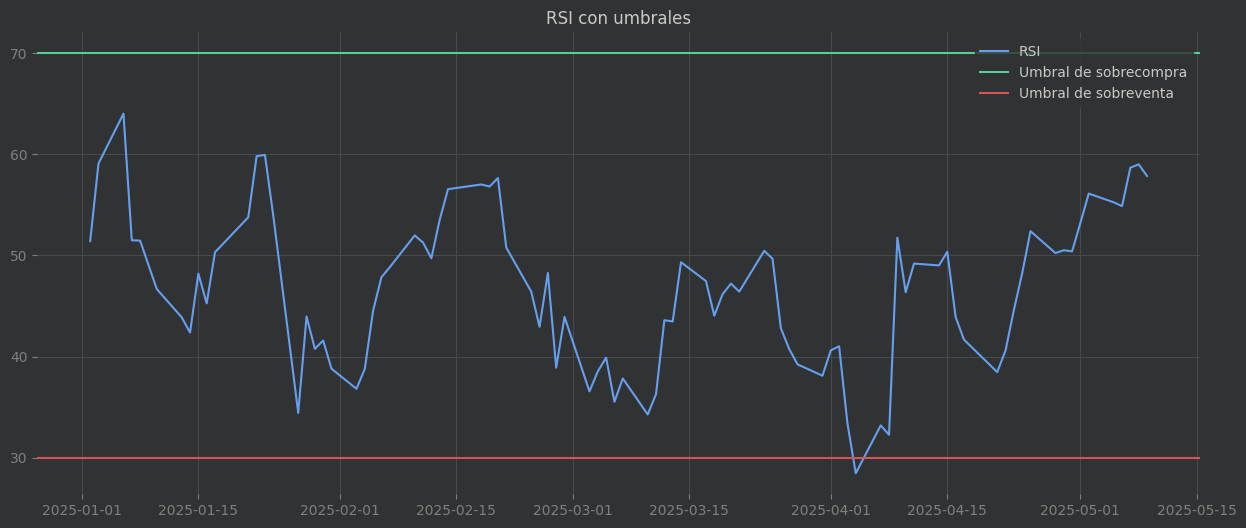

In [33]:
# Gráfica del RSI con lineas de sobreventa y sobrecompra para NVDA 2025

# Tamaño de la gráfica
plt.figure(figsize=(15,6))

# Vista del RSI
plt.plot(f["rsi"].loc["2025"])

# Vista horizontal d ela linea Overbuy  (RSI=70)
plt.axhline(70, color="#57CE95")

# Vista de la linea  Oversell  (RSI=30)
plt.axhline(30, color="#CE5757")

#
plt.title("RSI con umbrales")

#
plt.legend(["RSI", "Umbral de sobrecompra", "Umbral de sobreventa"])

# Show the graph
plt.show()

# Creando una estrategia con el RSI

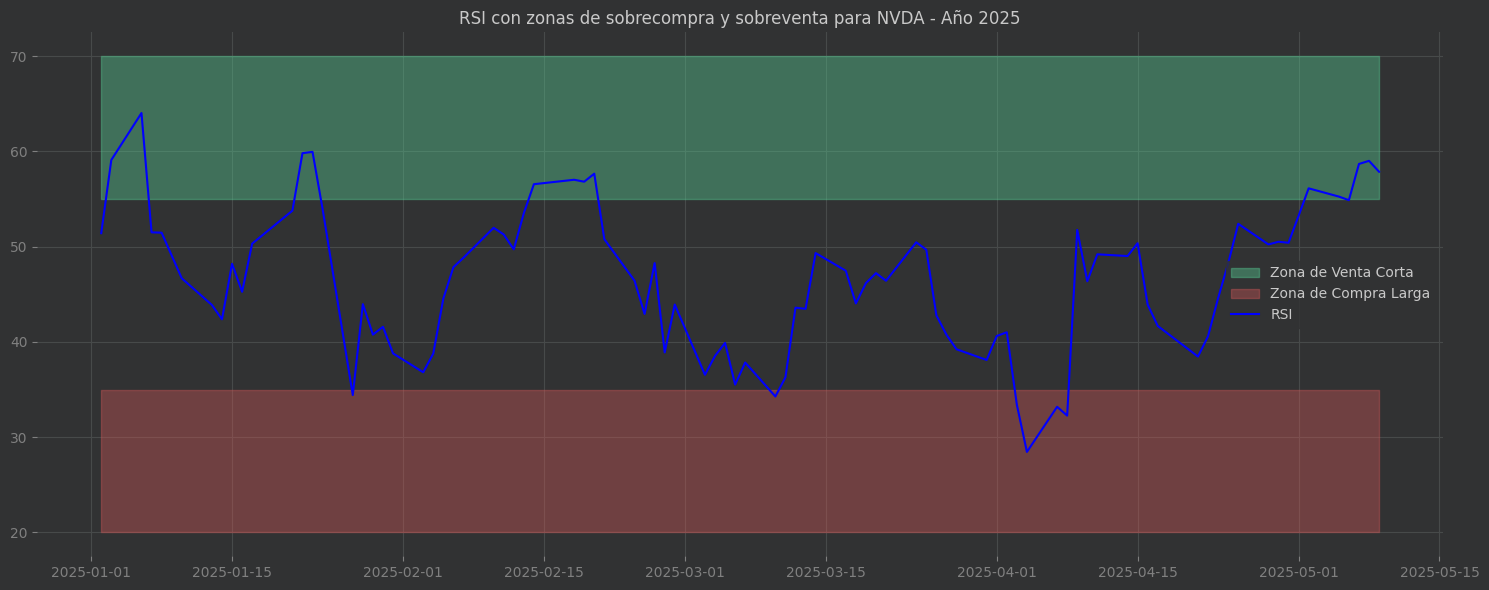

In [52]:
plt.figure(figsize=(15,6))

# Extraer RSI de 2025
rsi_2025 = f["rsi"].loc["2025"]

# Zonas de sobrecompra/sobreventa fijas
plt.fill_between(rsi_2025.index, 55,70, color="#57CE95", alpha=0.4, label="Zona de Venta Corta")
plt.fill_between(rsi_2025.index, 20, 35, color="#CE5757", alpha=0.4, label="Zona de Compra Larga")

# RSI
plt.plot(rsi_2025.index, rsi_2025.values, label="RSI", color="blue")

# Estética
plt.title("RSI con zonas de sobrecompra y sobreventa para NVDA - Año 2025")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [55]:
# Definimos cuando la estrategia debe tomar una compra larga o una venta corta

# Necesitamos definir la señal de apertura en largo y la señal de cierre en largo

# Ponemos el umbral
overbuy = 70
neutral_buy = 45

# Poner valores nan para las columnas de la señal larga
f["signal_long"] = np.nan
f["yersteday_rsi"] = f["rsi"].shift(1)
# Necesitamos definir la señal de apertura en largo (RSI ayer<55 y RSI hoy>55)
f.loc[(f["rsi"]>neutral_buy) & (f["yersteday_rsi"]<neutral_buy), "signal_long"] = 1

# Necesitamos definir la señal cierre en largo (RSI ayer>55 y RSI hoy<55) Señal falsa
f.loc[(f["rsi"]<neutral_buy)&(f["yersteday_rsi"]>neutral_buy), "signal_long"] = 0

# Necesitamos definir la señal cierre en largo (RSI yersteday<70 y RSI today>70) Señal de sobrecompra
f.loc[(f["rsi"]>overbuy)&(f["yersteday_rsi"]<overbuy), "signal_long"] = 0


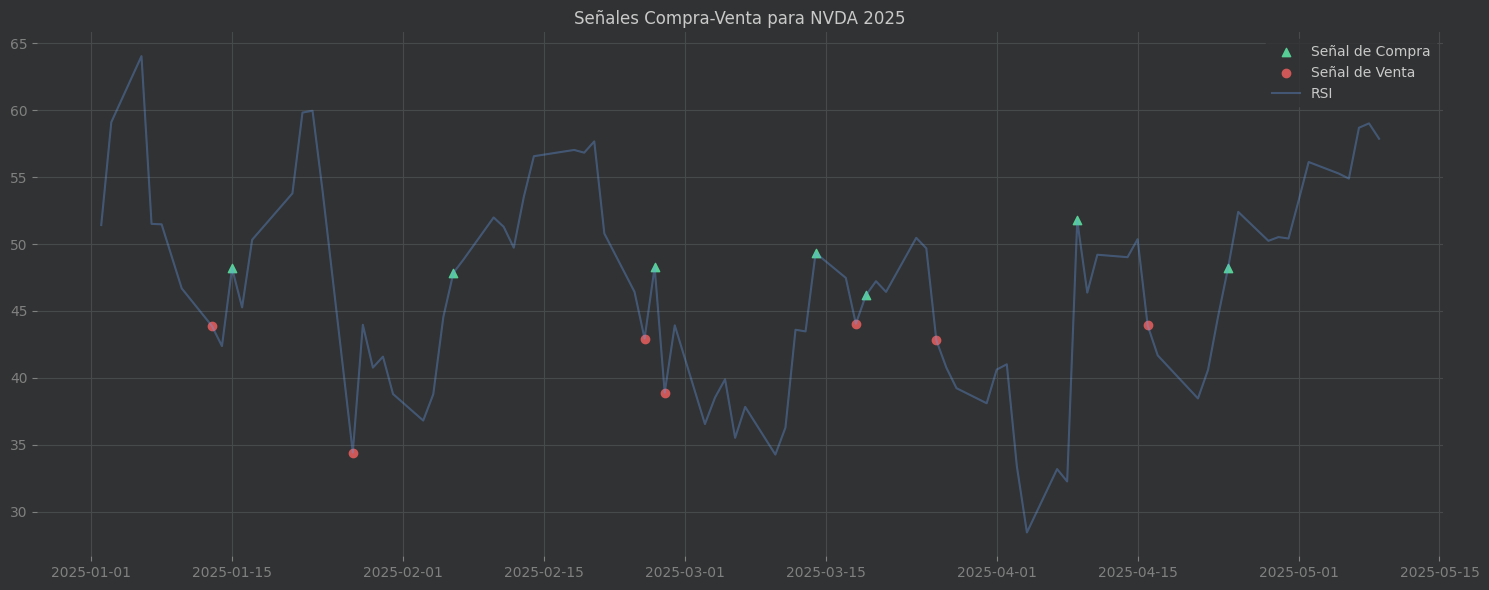

In [83]:
# Representamos todas las señales para asegurarnos de que son correctas

# Seleccionar los índices con señales de apertura y cierre
idx_open = f.loc[f["signal_long"] == 1].loc["2025"].index
idx_close = f.loc[f["signal_long"] == 0].loc["2025"].index

# Adaptar el tamaño del gráfico
plt.figure(figsize=(15, 6))

# Señales de entrada (compra)
plt.scatter(f.loc[idx_open]["rsi"].index, f.loc[idx_open]["rsi"].loc["2025"],
            color="#57CE95", marker="^", label="Señal de Compra")

# Señales de salida (venta)
plt.scatter(f.loc[idx_close]["rsi"].index, f.loc[idx_close]["rsi"].loc["2025"],
            color="#CE5757", marker="o", label="Señal de Venta")

# Línea del RSI
plt.plot(f["rsi"].loc["2025"].index, f["rsi"].loc["2025"],
         alpha=0.35, label="RSI")

# Añadir título
plt.title("Señales Compra-Venta para NVDA 2025")

# Añadir leyenda (opcional)
plt.legend()

# Mostrar gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


In [57]:
# Definimos cuando la estrategia debe tomar una compra larga o una venta corta

# ******************************************************************************
# Necesitamos definir la señal de Abrir la posición Corta y Cerrar la posición Corta

# Ponemos el umbral
oversell = 30
neutral_sell= 45

# Poner valores nan para las columnas de la señal larga
f["signal_short"] = np.nan
f["yersteday_rsi"] = f["rsi"].shift(1)
# Necesitamos definir la señal de apertura en corto (RSI ayer>45 y RSI hoy<45)
f.loc[(f["rsi"]<neutral_sell) & (f["yersteday_rsi"]>neutral_sell), "signal_short"] = -1

# Necesitamos definir la señal de cierre en corto (RSI ayer<45 y RSI hoy>45) Señal falsa
f.loc[(f["rsi"]>neutral_sell)&(f["yersteday_rsi"]<neutral_sell), "signal_short"] = 0

# Necesitamos definir la señal de cierre en corto (RSI ayer>30 y RSI hoy<30) Señal de sobre venta
f.loc[(f["rsi"]<oversell)&(f["yersteday_rsi"]>oversell), "signal_short"] = 0

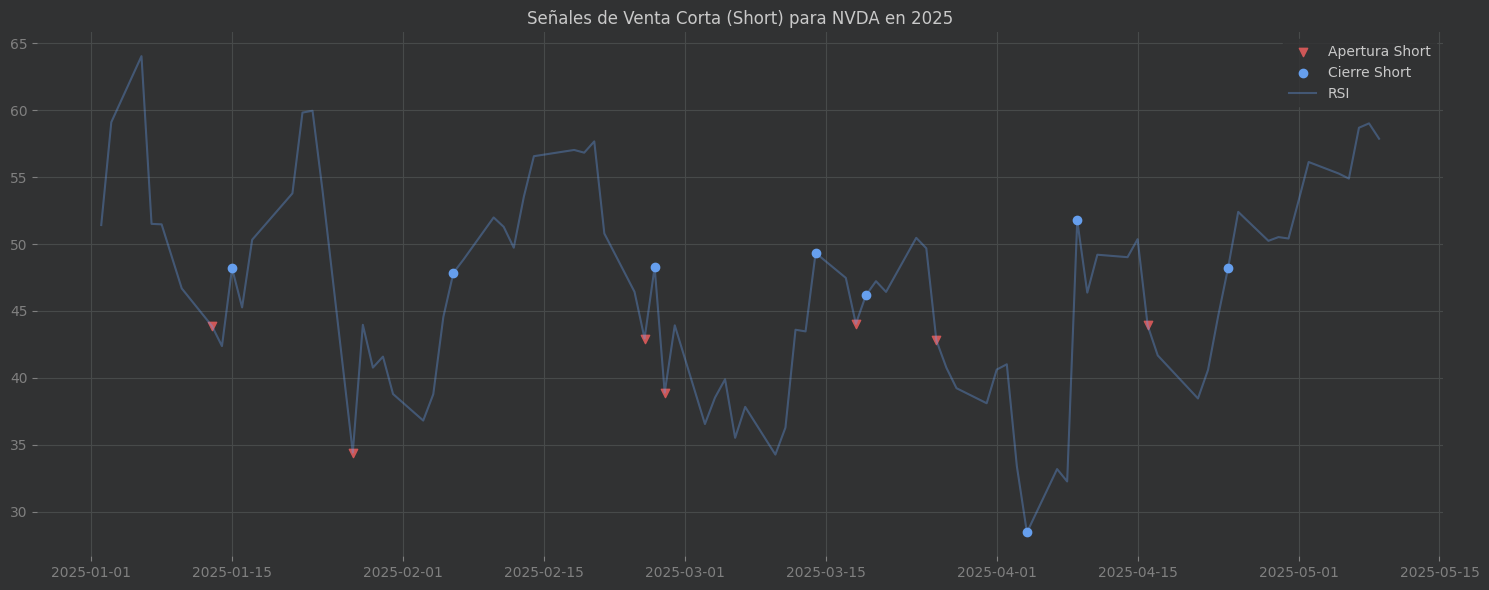

In [84]:
#### Señales de Venta Corta (Short) para NVDA en 2025
# Representamos todas las señales para asegurarnos de que son correctas

# Seleccionar todas las señales en una lista de índices para representar sólo estos puntos
idx_open = f.loc[f["signal_short"] == -1].loc["2025"].index
idx_close = f.loc[f["signal_short"] == 0].loc["2025"].index

# Adaptar el tamaño del gráfico
plt.figure(figsize=(15, 6))

# Traza los puntos de la apertura de señal corta en rojo
plt.scatter(f.loc[idx_open]["rsi"].index, f.loc[idx_open]["rsi"].loc["2025"],
            color="#CE5757", marker="v", label="Apertura Short")

# Traza los puntos del cierre de señal corta en azul
plt.scatter(f.loc[idx_close]["rsi"].index, f.loc[idx_close]["rsi"].loc["2025"],
            color="#669FEE", marker="o", label="Cierre Short")

# Representamos el RSI
plt.plot(f["rsi"].loc["2025"].index, f["rsi"].loc["2025"],
         alpha=0.35, label="RSI")

# Título del gráfico
plt.title("Señales de Venta Corta (Short) para NVDA en 2025")

# Leyenda
plt.legend()

# Mostrar gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


In [69]:
f["Position"] = (f["signal_short"].fillna(method="ffill")+ f["signal_long"].fillna(method="ffill"))
f.dropna(thresh = 10)

Price,Adj Close,Close,High,Low,Open,Volume,rsi,signal_long,yersteday_rsi,signal_short,Position,pct,return
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA,,,,,,,
Date,,,,,,,,,,,,,
1999-02-11,0.037731,0.041146,0.042708,0.038021,0.038021,132240000,52.766302,1.0,40.128671,0.0,1.0,NaN,NaN
1999-02-24,0.045372,0.049479,0.054688,0.048307,0.052604,612768000,70.509961,0.0,63.570322,NaN,0.0,NaN,NaN
1999-03-23,0.036537,0.039844,0.042708,0.039063,0.042708,163968000,40.129332,0.0,46.935082,-1.0,-1.0,NaN,NaN
1999-03-26,0.040000,0.043620,0.043750,0.040625,0.040625,88272000,52.516483,1.0,41.450633,0.0,1.0,NaN,NaN
1999-04-06,0.037015,0.040365,0.041927,0.039583,0.041797,69696000,44.394039,0.0,46.675504,-1.0,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-26,113.760002,113.760002,118.839996,112.709999,118.730003,293463300,42.799081,0.0,49.678219,-1.0,-1.0,NaN,NaN
2025-04-04,94.309998,94.309998,100.129997,92.110001,98.910004,532273800,28.457036,NaN,33.400965,0.0,0.0,NaN,NaN


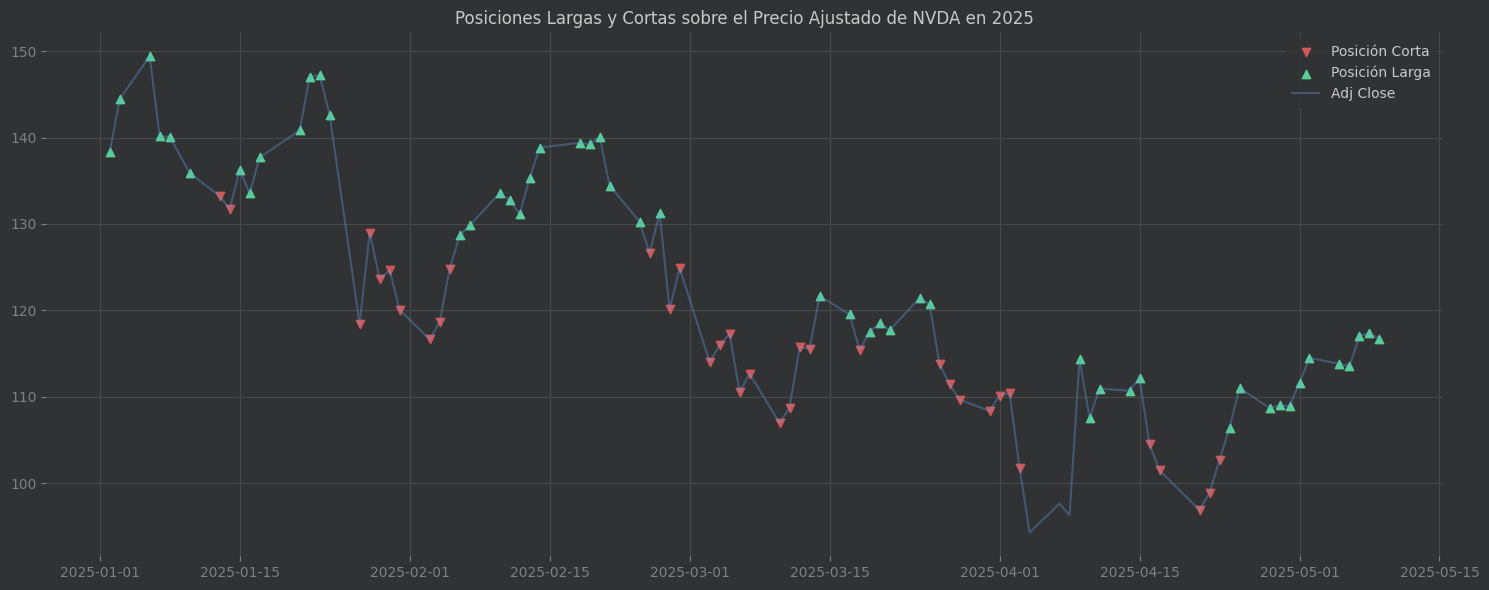

In [85]:
### Visualización de las Posiciones Largas y Cortas sobre el Precio de Cierre Ajustado para NVDA - Año 2025

# Ploteamos las señales para ver que son correctas
year = "2025"
idx_long = f.loc[f["Position"] == 1].loc[year].index
idx_short = f.loc[f["Position"] == -1].loc[year].index

# Tamaño de la gráfica
plt.figure(figsize=(15, 6))

# Señales de posición corta (Short) en rojo
plt.scatter(f.loc[idx_short]["Adj Close"].index,
            f.loc[idx_short]["Adj Close"].loc[year],
            color="#CE5757", marker="v", label="Posición Corta")

# Señales de posición larga (Long) en verde
plt.scatter(f.loc[idx_long]["Adj Close"].index,
            f.loc[idx_long]["Adj Close"].loc[year],
            color="#57CE95", marker="^", label="Posición Larga")

# Precio ajustado
plt.plot(f["Adj Close"].loc[year].index,
         f["Adj Close"].loc[year], alpha=0.35, label="Adj Close")

# Título y leyenda
plt.title("Posiciones Largas y Cortas sobre el Precio Ajustado de NVDA en 2025")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


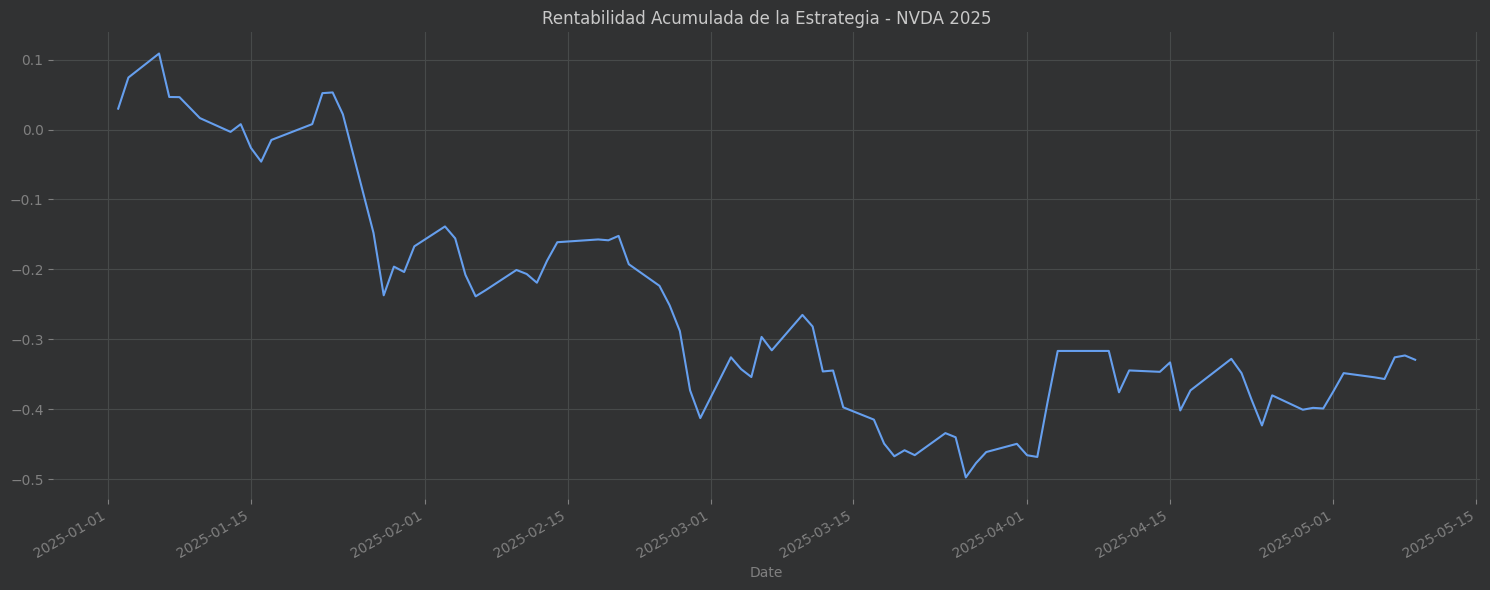

In [86]:

### Cálculo del Retorno Diario y Rentabilidad Acumulada para NVDA en 2025

# Extraer correctamente la columna 'Adj Close' para NVDA
adj_close = f["Adj Close"]["NVDA"]

# Calcular el % de variación diaria
f["pct"] = adj_close.pct_change()

# Calcular la rentabilidad de la estrategia (posición desplazada un día)
f["return"] = f["pct"] * f["Position"].shift(1)

# Verificar si hay datos para 2025
if not f["return"].loc["2025"].dropna().empty:
    # Graficar la rentabilidad acumulada
    f["return"].loc["2025"].cumsum().plot(figsize=(15,6), title="Rentabilidad Acumulada de la Estrategia - NVDA 2025")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No hay datos de retorno disponibles para 2025. Verifica fechas y datos.")
